<div style="display: flex; align-items: center;">
    <img alt="udeA logo" height="140px" src="https://github.com/freddyduitama/images/blob/master/logo.png?raw=true" style="width:107px;height:152px; margin-right: 40px;">
    <div style="text-align: center;">
        <h1><b><font color='0B5345'>Sistema Predictor de grupos relacionados por el diagn√≥stico</font></b></h1>
        <h2><font color='0B5345'>Luisa Enciso - Mar√≠a Ostos - Santiago Rivera</font></h2>
    </div>
</div>


In [165]:
import pandas as pd
import numpy as np
import unicodedata
import matplotlib.pyplot as plt

In [166]:
def mostrar_informe(df):
    print("Informe estad√≠stico de la base de datos")
    print("="*50, "\n")
    
    # 1. Informaci√≥n general
    print(f"N√∫mero de registros: {df.shape[0]}")
    print(f"N√∫mero de columnas: {df.shape[1]}\n")
    
    # 2. Valores nulos por columna
    print("Valores nulos por columna:")
    print(df.isna().sum())
    print("\n")
    
    # 3. Valores √∫nicos por columna
    print("N√∫mero de valores √∫nicos por columna:")
    print(df.nunique())
    print("\n")
    
    # 4. Estad√≠sticas descriptivas para columnas num√©ricas
    print("Estad√≠sticas descriptivas (num√©ricas):")
    print(df.describe())
    print("\n")
    
    # 5. Frecuencias para variables categ√≥ricas
    cat_cols = df.select_dtypes(include=['object', 'category']).columns
    if len(cat_cols) > 0:
        print("Frecuencias para variables categ√≥ricas:")
        for col in cat_cols:
            print(f"\nColumna: {col}")
            print(df[col].value_counts(dropna=False))
    else:
        print("No se encontraron columnas categ√≥ricas.")

<hr>

# Inspecci√≥n de la base de datos

In [167]:
# Ruta del archivo Excel
archivo_excel = 'DataBase.xlsx'
# Cargar el archivo Excel
df = pd.read_excel(archivo_excel, engine='openpyxl')
# Mostrar las primeras filas
df.head()

Num caso  Aseguradora -C√≥digo- Aseguradora -Descripci√≥n-  Edad Grupo Edad  \
0  413799.0                   204            Aseguradora_29    38      35-39   
1  412359.0                   313            Aseguradora_56    27      25-29   
2  412552.0                   313            Aseguradora_56    39      35-39   
3  414131.0                   227            Aseguradora_46    24      20-24   
4  410573.0                   227            Aseguradora_46    60      60-64   

  Sexo  Codigo de ciudad  Fecha de ingreso Tipo de ingreso  Fecha de egreso  \
0    F              5001          30052005        URGENCIA         19062005   
1    M              5088          11032005        URGENCIA         10042005   
2    M              5001          20032005        URGENCIA         10042005   
3    M              5001          20062005        URGENCIA         22062005   
4    M              5001          24112004        URGENCIA          7012005   

   ...  Proc28  Proc29 Proc30     Tipo servicio  Causa Basica de muerte  \
0  ...     NaN     NaN    NaN  URGENCIA ADULTOS                     NaN   
1  ...     NaN     NaN    NaN         NO APLICA                     NaN   
2  ...     NaN     NaN    NaN  URGENCIA ADULTOS                     NaN   
3  ...     NaN     NaN    NaN  URGENCIA ADULTOS                     NaN   
4  ...     NaN     NaN    NaN  URGENCIA ADULTOS                     NaN   

  Infecciones Infecci√≥n Quirurgica GRD -C√≥digo  \
0          NO                   NO       14143   
1          NO                   NO      184153   
2          NO                   NO      184153   
3          NO                   NO      184153   
4          NO                   NO      184112   

                                    GRD -Descripci√≥n Tipo GRD  
0   MH ACCIDENTE VASCULAR CEREBRAL CON INFARTO w/MCC        M  
1  MH INFECCI√ìN POR VIRUS DE INMUNODEFICIENCIA HU...        M  
2  MH INFECCI√ìN POR VIRUS DE INMUNODEFICIENCIA HU...        M  
3  MH INFECCI√ìN POR VIRUS DE INMUNODEFICIENCIA HU...        M  
4  MH INFECCIONES POST OPERATORIAS Y POSTRAUM√ÅTIC...        M  

[5 rows x 68 columns]

## **Informe Estad√≠stico Inicial de la Base de Datos**

In [168]:
df_informe = pd.read_excel(archivo_excel, engine='openpyxl')
mostrar_informe(df_informe)

Informe estad√≠stico de la base de datos

N√∫mero de registros: 27869
N√∫mero de columnas: 68

Valores nulos por columna:
Num caso                     1
Aseguradora -C√≥digo-         0
Aseguradora -Descripci√≥n-    0
Edad                         0
Grupo Edad                   0
                            ..
Infecciones                  0
Infecci√≥n Quirurgica         0
GRD -C√≥digo                  0
GRD -Descripci√≥n             0
Tipo GRD                     0
Length: 68, dtype: int64


N√∫mero de valores √∫nicos por columna:
Num caso                     7900
Aseguradora -C√≥digo-           62
Aseguradora -Descripci√≥n-      71
Edad                          108
Grupo Edad                     20
                             ... 
Infecciones                     4
Infecci√≥n Quirurgica            4
GRD -C√≥digo                   608
GRD -Descripci√≥n              608
Tipo GRD                        4
Length: 68, dtype: int64


Estad√≠sticas descriptivas (num√©ricas):
            Num ca

## 1. Descripci√≥n General

- **N√∫mero total de registros:** 27,869
- **N√∫mero total de columnas:** 68

Este informe presenta un an√°lisis descriptivo preliminar con el fin de entender la estructura, calidad y caracter√≠sticas generales del conjunto de datos.



## 2. Calidad de los Datos

- **Valores nulos por columna:**
    
    La mayor√≠a de las columnas no presentan valores nulos. Se identifica 1 registro con valor nulo en la columna `Num caso`.
      



## 3. Distribuci√≥n de Datos Categ√≥ricos

Se presentan las frecuencias de las principales variables categ√≥ricas para identificar posibles valores at√≠picos o inconsistencias, adem√°s de observar la distribuci√≥n general:

- **Sexo:**
    - Masculino (M): 14,353
    - Femenino (F): 13,512
    - Valores inconsistentes (m, f): 4 (corregir para homogeneizar)
- **Tipo de ingreso:**
    - Urgencia: 25,570
    - Programado: 2,294
    - Valores inconsistentes (variaciones en may√∫sculas/min√∫sculas): corregir para uniformidad
- **Cuidados intensivos:**
    - NO: 26,681
    - SI: 1,182
    - Valores inconsistentes (variaciones en may√∫sculas/min√∫sculas): corregir
- **Grupo Etario:**
    
    Distribuci√≥n detallada por rangos de edad, destacando grupos mayores (75-79, 80-84 a√±os) con mayor frecuencia.
    
- **Aseguradora:**
    
    71 categor√≠as, con 5 aseguradoras predominantes que concentran la mayor√≠a de los registros.
    
- **Diagn√≥sticos (Dx principal y Dxr 1-9):**
    
    Amplia variedad con valores NaN significativos en las √∫ltimas columnas de diagn√≥sticos secundarios.
    


## 4. Estad√≠sticas Descriptivas para Variables Num√©ricas

- **Edad:**
    - Media: 57.7 a√±os
    - Rango: 0 a 109 a√±os
    - Desviaci√≥n est√°ndar: 24.17
- **D√≠as de estancia hospitalaria:**
    - Media: 8.45 d√≠as
    - Rango: 0 a 174 d√≠as
    - Mediana: 6 d√≠as
- **D√≠as en Unidad de Cuidados Intensivos:**
    - Media: 0.38 d√≠as
    - Alta dispersi√≥n con m√°ximo de 92 d√≠as, pero la mayor√≠a sin estancia en UCI.
    
- **Variables de Procedimientos (Proc22 a Proc30):**
    
    Presentan muchos valores faltantes (solo disponibles en pocas observaciones), con medias alrededor de 83-89 y alta variabilidad en algunos casos. Se debe evaluar relevancia para an√°lisis futuros.
    



## 5. Observaciones Generales
- Unificar formatos en variables categ√≥ricas (ej. may√∫sculas/min√∫sculas).
- Tratar valores faltantes, en particular en columnas diagn√≥sticas y procedimientos.
- Validar posibles registros duplicados.
- Eliminar categor√≠as muy espec√≠ficas o poco frecuentes en variables categ√≥ricas para evitar ruido.



## 6. Conclusiones preliminares

El dataset es amplio y contiene informaci√≥n cl√≠nica valiosa. Se evidencia buena calidad general en t√©rminos de datos faltantes, salvo excepciones puntuales. La distribuci√≥n etaria y los diagn√≥sticos principales presentan un perfil coherente para un estudio de an√°lisis de gesti√≥n hospitalaria. Sin embargo, es imprescindible realizar un proceso de limpieza y transformaci√≥n para garantizar la calidad y precisi√≥n en an√°lisis posteriores.

<hr>

# **Limpieza de la base de datos**

In [169]:
# ====================================================================
# 1. LIMPIEZA B√ÅSICA DE TEXTO
# ====================================================================
# Se estandarizan los textos a may√∫sculas y se eliminan las tildes,
# aplicando esta limpieza √∫nicamente a las columnas de tipo string
# (sin afectar columnas num√©ricas). Adem√°s, se normalizan los nombres 
# de las columnas.
# ====================================================================

def limpiar_texto(texto):
    if isinstance(texto, str):
        texto = texto.upper()
        texto = unicodedata.normalize('NFKD', texto)
        texto = ''.join([c for c in texto if not unicodedata.combining(c)])
        return texto
    return texto

# Aplicar solo a columnas de texto
columnas_texto = df.select_dtypes(include='object').columns
df[columnas_texto] = df[columnas_texto].applymap(limpiar_texto)

# Limpiar nombres de columnas
df.columns = [limpiar_texto(col) for col in df.columns]

df.head()


C:\Users\luisa\AppData\Local\Temp\ipykernel_14304\3964459031.py:20: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[columnas_texto] = df[columnas_texto].applymap(limpiar_texto)


NUM CASO  ASEGURADORA -CODIGO- ASEGURADORA -DESCRIPCION-  EDAD GRUPO EDAD  \
0  413799.0                   204            ASEGURADORA_29    38      35-39   
1  412359.0                   313            ASEGURADORA_56    27      25-29   
2  412552.0                   313            ASEGURADORA_56    39      35-39   
3  414131.0                   227            ASEGURADORA_46    24      20-24   
4  410573.0                   227            ASEGURADORA_46    60      60-64   

  SEXO  CODIGO DE CIUDAD  FECHA DE INGRESO TIPO DE INGRESO  FECHA DE EGRESO  \
0    F              5001          30052005        URGENCIA         19062005   
1    M              5088          11032005        URGENCIA         10042005   
2    M              5001          20032005        URGENCIA         10042005   
3    M              5001          20062005        URGENCIA         22062005   
4    M              5001          24112004        URGENCIA          7012005   

   ...  PROC28  PROC29 PROC30     TIPO SERVICIO  CAUSA BASICA DE MUERTE  \
0  ...     NaN     NaN    NaN  URGENCIA ADULTOS                     NaN   
1  ...     NaN     NaN    NaN         NO APLICA                     NaN   
2  ...     NaN     NaN    NaN  URGENCIA ADULTOS                     NaN   
3  ...     NaN     NaN    NaN  URGENCIA ADULTOS                     NaN   
4  ...     NaN     NaN    NaN  URGENCIA ADULTOS                     NaN   

  INFECCIONES INFECCION QUIRURGICA GRD -CODIGO  \
0          NO                   NO       14143   
1          NO                   NO      184153   
2          NO                   NO      184153   
3          NO                   NO      184153   
4          NO                   NO      184112   

                                    GRD -DESCRIPCION TIPO GRD  
0   MH ACCIDENTE VASCULAR CEREBRAL CON INFARTO W/MCC        M  
1  MH INFECCION POR VIRUS DE INMUNODEFICIENCIA HU...        M  
2  MH INFECCION POR VIRUS DE INMUNODEFICIENCIA HU...        M  
3  MH INFECCION POR VIRUS DE INMUNODEFICIENCIA HU...        M  
4  MH INFECCIONES POST OPERATORIAS Y POSTRAUMATIC...        M  

[5 rows x 68 columns]

In [170]:
# ================================================================
# 2. AN√ÅLISIS DE CALIDAD DE LAS COLUMNAS
# ================================================================
# Se realiza un diagn√≥stico exploratorio por columna que incluye:
# - Conteo de valores nulos
# - N√∫mero de valores √∫nicos
# - Ejemplos representativos de valores
# - Identificaci√≥n de columnas con baja utilidad (e.g., constantes)
# ================================================================

print('--- Valores NaN por columna ---')
print(df.isna().sum())

descripcion_columnas = []
for col in df.columns:
    valores_unicos = df[col].nunique(dropna=True)
    muestra_valores = df[col].unique()[:5]
    descripcion_columnas.append({
        'columna': col,
        'valores_unicos': valores_unicos,
        'muestra_valores': muestra_valores
    })

print('\n--- Resumen de columnas ---')
for desc in descripcion_columnas:
    print(f"Columna: {desc['columna']}")
    print(f"  Valores √∫nicos: {desc['valores_unicos']}")
    print(f"  Ejemplo de valores: {desc['muestra_valores']}")
    if desc['valores_unicos'] == 1:
        print('  -> ¬°OJO! Solo hay un valor √∫nico.')
    print()
df.head()

--- Valores NaN por columna ---
NUM CASO                     1
ASEGURADORA -CODIGO-         0
ASEGURADORA -DESCRIPCION-    0
EDAD                         0
GRUPO EDAD                   0
                            ..
INFECCIONES                  0
INFECCION QUIRURGICA         0
GRD -CODIGO                  0
GRD -DESCRIPCION             0
TIPO GRD                     0
Length: 68, dtype: int64

--- Resumen de columnas ---
Columna: NUM CASO
  Valores √∫nicos: 7900
  Ejemplo de valores: [413799. 412359. 412552. 414131. 410573.]

Columna: ASEGURADORA -CODIGO-
  Valores √∫nicos: 62
  Ejemplo de valores: [204 313 227 112 221]

Columna: ASEGURADORA -DESCRIPCION-
  Valores √∫nicos: 71
  Ejemplo de valores: ['ASEGURADORA_29' 'ASEGURADORA_56' 'ASEGURADORA_46' 'ASEGURADORA_21'
 'ASEGURADORA_28']

Columna: EDAD
  Valores √∫nicos: 108
  Ejemplo de valores: [38 27 39 24 60]

Columna: GRUPO EDAD
  Valores √∫nicos: 20
  Ejemplo de valores: ['35-39' '25-29' '20-24' '60-64' '75-79']

Columna: SEXO
  V

NUM CASO  ASEGURADORA -CODIGO- ASEGURADORA -DESCRIPCION-  EDAD GRUPO EDAD  \
0  413799.0                   204            ASEGURADORA_29    38      35-39   
1  412359.0                   313            ASEGURADORA_56    27      25-29   
2  412552.0                   313            ASEGURADORA_56    39      35-39   
3  414131.0                   227            ASEGURADORA_46    24      20-24   
4  410573.0                   227            ASEGURADORA_46    60      60-64   

  SEXO  CODIGO DE CIUDAD  FECHA DE INGRESO TIPO DE INGRESO  FECHA DE EGRESO  \
0    F              5001          30052005        URGENCIA         19062005   
1    M              5088          11032005        URGENCIA         10042005   
2    M              5001          20032005        URGENCIA         10042005   
3    M              5001          20062005        URGENCIA         22062005   
4    M              5001          24112004        URGENCIA          7012005   

   ...  PROC28  PROC29 PROC30     TIPO SERVICIO  CAUSA BASICA DE MUERTE  \
0  ...     NaN     NaN    NaN  URGENCIA ADULTOS                     NaN   
1  ...     NaN     NaN    NaN         NO APLICA                     NaN   
2  ...     NaN     NaN    NaN  URGENCIA ADULTOS                     NaN   
3  ...     NaN     NaN    NaN  URGENCIA ADULTOS                     NaN   
4  ...     NaN     NaN    NaN  URGENCIA ADULTOS                     NaN   

  INFECCIONES INFECCION QUIRURGICA GRD -CODIGO  \
0          NO                   NO       14143   
1          NO                   NO      184153   
2          NO                   NO      184153   
3          NO                   NO      184153   
4          NO                   NO      184112   

                                    GRD -DESCRIPCION TIPO GRD  
0   MH ACCIDENTE VASCULAR CEREBRAL CON INFARTO W/MCC        M  
1  MH INFECCION POR VIRUS DE INMUNODEFICIENCIA HU...        M  
2  MH INFECCION POR VIRUS DE INMUNODEFICIENCIA HU...        M  
3  MH INFECCION POR VIRUS DE INMUNODEFICIENCIA HU...        M  
4  MH INFECCIONES POST OPERATORIAS Y POSTRAUMATIC...        M  

[5 rows x 68 columns]

In [171]:
# =============================================================================
# 3. NORMALIZACI√ìN DE VALORES EQUIVALENTES
# =============================================================================
# Se unifican valores sem√°nticamente equivalentes que presentan
# diferencias en su escritura. Ejemplo: "URGENCIAS PEDIATRICAS" ‚Üí "URGENCIA".
# Esta etapa mejora la consistencia y reduce la cardinalidad de las categor√≠as.
# =============================================================================

normalizaciones = {
    'TIPO DE INGRESO': {
        'URGENCIAS': 'URGENCIA',
        'URGENCIA ADULTOS': 'URGENCIA',
        'U. ADULTOS': 'URGENCIA',
        'URGENCIA PEDIATRICA': 'URGENCIA',
        'URGENCIA OBSTETRICA': 'URGENCIA',
    },
    'SITUACION AL ALTA': {
        'MUERTO': 'FALLECIDO',
        'DEFUNCION': 'FALLECIDO',
    },
    'SERVICIOALTA': {
        'URGENCIAS': 'URGENCIA',
        'U. ADULTOS': 'URGENCIA',
    }
}

for columna, reemplazos in normalizaciones.items():
    if columna in df.columns:
        df[columna] = df[columna].replace(reemplazos)

print("Valores equivalentes normalizados.")
df.head()

Valores equivalentes normalizados.


NUM CASO  ASEGURADORA -CODIGO- ASEGURADORA -DESCRIPCION-  EDAD GRUPO EDAD  \
0  413799.0                   204            ASEGURADORA_29    38      35-39   
1  412359.0                   313            ASEGURADORA_56    27      25-29   
2  412552.0                   313            ASEGURADORA_56    39      35-39   
3  414131.0                   227            ASEGURADORA_46    24      20-24   
4  410573.0                   227            ASEGURADORA_46    60      60-64   

  SEXO  CODIGO DE CIUDAD  FECHA DE INGRESO TIPO DE INGRESO  FECHA DE EGRESO  \
0    F              5001          30052005        URGENCIA         19062005   
1    M              5088          11032005        URGENCIA         10042005   
2    M              5001          20032005        URGENCIA         10042005   
3    M              5001          20062005        URGENCIA         22062005   
4    M              5001          24112004        URGENCIA          7012005   

   ...  PROC28  PROC29 PROC30     TIPO SERVICIO  CAUSA BASICA DE MUERTE  \
0  ...     NaN     NaN    NaN  URGENCIA ADULTOS                     NaN   
1  ...     NaN     NaN    NaN         NO APLICA                     NaN   
2  ...     NaN     NaN    NaN  URGENCIA ADULTOS                     NaN   
3  ...     NaN     NaN    NaN  URGENCIA ADULTOS                     NaN   
4  ...     NaN     NaN    NaN  URGENCIA ADULTOS                     NaN   

  INFECCIONES INFECCION QUIRURGICA GRD -CODIGO  \
0          NO                   NO       14143   
1          NO                   NO      184153   
2          NO                   NO      184153   
3          NO                   NO      184153   
4          NO                   NO      184112   

                                    GRD -DESCRIPCION TIPO GRD  
0   MH ACCIDENTE VASCULAR CEREBRAL CON INFARTO W/MCC        M  
1  MH INFECCION POR VIRUS DE INMUNODEFICIENCIA HU...        M  
2  MH INFECCION POR VIRUS DE INMUNODEFICIENCIA HU...        M  
3  MH INFECCION POR VIRUS DE INMUNODEFICIENCIA HU...        M  
4  MH INFECCIONES POST OPERATORIAS Y POSTRAUMATIC...        M  

[5 rows x 68 columns]

In [172]:
# ==========================================================================
# 4. ELIMINACI√ìN DE COLUMNAS PROBLEM√ÅTICAS
# ==========================================================================
# Se descartan columnas que aportan poco valor al an√°lisis:
# - Columnas con m√°s del 70% de valores nulos
# - Columnas con un √∫nico valor distinto (baja variabilidad)
# - Columnas administrativas o irrelevantes para el objetivo del an√°lisis
# ==========================================================================

# Columnas con muchos nulos
umbral_nan = 0.7
columnas_a_eliminar = df.columns[df.isna().mean() > umbral_nan].tolist()

# Columnas con un solo valor
columnas_un_valor = [col for col in df.columns if df[col].nunique() == 1]

# Columnas irrelevantes conocidas
columnas_irrelevantes = [
    'NUM CASO', 'ASEGURADORA -CODIGO-', 'ASEGURADORA -DESCRIPCION-', 'CODIGO DE CIUDAD',
    'FECHA DE EGRESO', 'CODIGO CAUSA EXTERNA', 'DIAS ESTANCIA', 'SERVICIOALTA',
    'CUIDADOS INTENSIVOS', 'DIAS DE UNIDAD CUIDADO INTENSIVO',
    'SITUACION AL ALTA', 'CAUSA BASICA DE MUERTE', 'INFECCIONES',
    'INFECCION QUIRURGICA', 'DX PRINCIPAL DE EGRESO ', 'DX PRINCIPAL DE EGRESO .1',
    'TIPO SERVICIO', 'PROC1','PROC2','PROC3', 'GRD -DESCRIPCION', 'TIPO GRD','GRUPO EDAD','DX DE INGRESO'
]

# Unificar y eliminar
todas_a_eliminar = list(set(columnas_a_eliminar + columnas_un_valor + columnas_irrelevantes))
df = df.drop(columns=[col for col in todas_a_eliminar if col in df.columns])
print(f"Columnas eliminadas: {todas_a_eliminar}")
df.head()

Columnas eliminadas: ['CODIGO DE CIUDAD', 'TIPO SERVICIO', 'DX PRINCIPAL DE EGRESO .1', 'TIPO GRD', 'INFECCION QUIRURGICA', 'PROC6', 'PROC11', 'PROC30', 'PROC23', 'FECHA DE EGRESO', 'PROC24', 'PROC22', 'PROC9', 'PROC7', 'PROC17', 'PROC29', 'PROC2', 'PROC27', 'PROC18', 'PROC5', 'PROC16', 'CAUSA BASICA DE MUERTE', 'PROC3', 'ASEGURADORA -DESCRIPCION-', 'PROC14', 'PROC20', 'PROC19', 'DIAS ESTANCIA', 'PROC1', 'DXR 9', 'DIAS DE UNIDAD CUIDADO INTENSIVO', 'SITUACION AL ALTA', 'PROC12', 'PROC4', 'GRUPO EDAD', 'PROC10', 'PROC15', 'CODIGO CAUSA EXTERNA', 'PROC21', 'CUIDADOS INTENSIVOS', 'CAUSA EXTERNA', 'DX PRINCIPAL DE EGRESO ', 'NUM CASO', 'SERVICIOALTA', 'GRD -DESCRIPCION', 'PROC28', 'DX DE INGRESO', 'PROC26', 'ASEGURADORA -CODIGO-', 'PROC8', 'DXR 7', 'DXR 10 ', 'INFECCIONES', 'PROC13', 'DXR 8', 'PROC25']


EDAD SEXO  FECHA DE INGRESO TIPO DE INGRESO  \
0    38    F          30052005        URGENCIA   
1    27    M          11032005        URGENCIA   
2    39    M          20032005        URGENCIA   
3    24    M          20062005        URGENCIA   
4    60    M          24112004        URGENCIA   

                                DX PPAL 3 CARACTERES DXR 1 DXR 2 DXR 3 DXR 4  \
0                                   INFARTO CEREBRAL  I652  C189  C787  C788   
1  ENFERMEDAD POR VIRUS DE LA INMUNODEFICIENCIA H...  B210  B204  B162  A530   
2  ENFERMEDAD POR VIRUS DE LA INMUNODEFICIENCIA H...  B451  G052  B588   D70   
3  ENFERMEDAD POR VIRUS DE LA INMUNODEFICIENCIA H...  B200  B210  A600  N518   
4  COMPLICACIONES DE PROCEDIMIENTOS NO CLASIFICAD...  Y838  C140  N390  B961   

  DXR 5 DXR-6  GRD -CODIGO  
0  N390  A048        14143  
1  D538  A071       184153  
2  D698  A072       184153  
3  A530  A073       184153  
4  B962  A099       184112

In [173]:
# ================================================================
# 5. CODIFICACI√ìN DE VARIABLES
# ================================================================
# - Variables binarias: codificar con 0 y 1.
# - Variables categ√≥ricas frecuentes: codificar por frecuencia.
# ================================================================

from sklearn.preprocessing import MinMaxScaler

# 1. Codificaci√≥n binaria
df['SEXO'] = df['SEXO'].map({'F': 0, 'M': 1})
df['TIPO DE INGRESO'] = df['TIPO DE INGRESO'].map({'PROGRAMADO': 0, 'URGENCIA': 1})

# 2. Codificaci√≥n por frecuencia (excepto √∫ltima columna)
columnas_objetivo = df.columns[:-1]  # Todas menos la √∫ltima

for col in columnas_objetivo:
    if col in df.columns:
        df[col] = df[col].map(df[col].value_counts())

df.head()



EDAD   SEXO  FECHA DE INGRESO  TIPO DE INGRESO  DX PPAL 3 CARACTERES  \
0   200  13514                81            25574                    92   
1   231  14355                85            25574                    13   
2   176  14355                88            25574                    10   
3   251  14355                64            25574                   127   
4   408  14355                 2            25574                   226   

   DXR 1  DXR 2  DXR 3  DXR 4  DXR 5  DXR-6  GRD -CODIGO  
0   26.0   18.0   21.0    3.0   95.0    2.0        14143  
1    8.0    7.0    1.0    9.0    7.0    1.0       184153  
2    2.0    2.0    1.0   78.0   10.0    1.0       184153  
3   11.0    3.0   10.0    8.0    2.0    1.0       184153  
4  269.0    1.0  256.0   77.0   71.0   31.0       184112

In [174]:
# ================================================================
# 6. NORMALIZACI√ìN MIN-MAX
# ================================================================
# - Se imputan NaN con 0
# - Se suma un peque√±o epsilon para evitar ceros exactos
# - Se aplica MinMaxScaler para escalar al rango [0, 1]
# - Se reconstruye el DataFrame con los nombres originales
# ================================================================


from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# 1. Reemplazar NaN por 0
df_clean = df.fillna(0)

# 2. Aumentar ligeramente los valores excepto la √∫ltima columna
epsilon = 1e-3
df_adjusted = df_clean.copy()
df_adjusted.iloc[:, :-1] += epsilon  # Solo las columnas excepto la √∫ltima

# 3. Aplicar MinMaxScaler solo a las columnas excepto la √∫ltima
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(df_adjusted.iloc[:, :-1])

# 4. Reconstruir el DataFrame escalado
df_f= pd.DataFrame(scaled_values, columns=df.columns[:-1])

# 5. Agregar la √∫ltima columna sin modificar
df_f[df.columns[-1]] = df_adjusted[df.columns[-1]]

# 6. Confirmaci√≥n
print("Normalizaci√≥n Min-Max aplicada.")
df_f.head()



Normalizaci√≥n Min-Max aplicada.


C:\Users\luisa\AppData\Local\Temp\ipykernel_14304\1610336004.py:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0        200.001
1        231.001
2        176.001
3        251.001
4        408.001
          ...   
27864    213.001
27865    501.001
27866    102.001
27867    221.001
27868    359.001
Name: EDAD, Length: 27869, dtype: float64' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_adjusted.iloc[:, :-1] += epsilon  # Solo las columnas excepto la √∫ltima
C:\Users\luisa\AppData\Local\Temp\ipykernel_14304\1610336004.py:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0        13514.001
1        14355.001
2        14355.001
3        14355.001
4        14355.001
           ...    
27864    13514.001
27865    14355.001
27866    13514.001
27867    14355.001
27868    14355.001
Name: SEXO, Length: 2786

EDAD  SEXO  FECHA DE INGRESO  TIPO DE INGRESO  DX PPAL 3 CARACTERES  \
0  0.336717   0.0          0.720721              1.0              0.066423   
1  0.389171   1.0          0.756757              1.0              0.008759   
2  0.296108   1.0          0.783784              1.0              0.006569   
3  0.423012   1.0          0.567568              1.0              0.091971   
4  0.688663   1.0          0.009009              1.0              0.164234   

      DXR 1     DXR 2     DXR 3     DXR 4     DXR 5     DXR-6  GRD -CODIGO  
0  0.018895  0.009793  0.012774  0.002669  0.135714  0.003781        14143  
1  0.005814  0.003808  0.000608  0.008007  0.010000  0.001890       184153  
2  0.001453  0.001088  0.000608  0.069395  0.014286  0.001890       184153  
3  0.007994  0.001632  0.006083  0.007117  0.002857  0.001890       184153  
4  0.195494  0.000544  0.155718  0.068505  0.101429  0.058601       184112

In [175]:
# ====================================================================================================
# 7. SELECCI√ìN DE CLASES PREDICTORAS
# ====================================================================================================
# Reduce la cantidad de clases a predecir, limitando el problema a los 30 GRDs m√°s frecuentes.
# ====================================================================================================

N = 30
top_grds = df_f['GRD -CODIGO'].value_counts().head(N).index
df_filtered = df_f[df['GRD -CODIGO'].isin(top_grds)].copy()
df_filtered.head()


EDAD  SEXO  FECHA DE INGRESO  TIPO DE INGRESO  DX PPAL 3 CARACTERES  \
5   0.859560   1.0          0.693694              1.0              0.354015   
12  0.522843   1.0          0.702703              0.0              0.356204   
15  0.296108   1.0          0.738739              0.0              0.356204   
16  0.664975   0.0          0.576577              1.0              0.867153   
17  0.324873   1.0          0.612613              0.0              0.356204   

       DXR 1     DXR 2     DXR 3     DXR 4     DXR 5     DXR-6  GRD -CODIGO  
5   0.209302  0.019587  0.023723  0.112100  0.135714  0.058601        54123  
12  0.058140  0.224157  0.091849  0.000890  0.002857  0.058601       174133  
15  0.008721  0.051687  0.078467  0.069395  0.462857  0.058601       174132  
16  0.293605  1.000000  0.130170  0.476868  0.135714  0.058601        44172  
17  0.029070  0.224157  0.054745  0.351423  0.030000  0.058601       174133

## **Guardar Base de datos limpia**



In [177]:
# ==============================================================================
# 8. GUARDADO FINAL
# ==============================================================================
# Se guarda el DataFrame limpio y normalizado para futuras etapas del pipeline.
# ==============================================================================

df_filtered.to_csv('DataBaseFinal_Normalizado.csv', index=False, sep=';')
print("Archivo guardado como 'DataBaseFinal_Normalizado.csv'")


Archivo guardado como 'DataBaseFinal_Normalizado.csv'


<hr>

# **Informe del an√°lisis estad√≠stico hecho a la base de datos limpia**

In [178]:
archivo_csv = 'DataBaseFinal_Normalizado.csv'
df_informe_limpio = pd.read_csv(archivo_csv,sep=';')
mostrar_informe(df_informe_limpio)

Informe estad√≠stico de la base de datos

N√∫mero de registros: 8775
N√∫mero de columnas: 12

Valores nulos por columna:
EDAD                    0
SEXO                    0
FECHA DE INGRESO        0
TIPO DE INGRESO         0
DX PPAL 3 CARACTERES    0
DXR 1                   0
DXR 2                   0
DXR 3                   0
DXR 4                   0
DXR 5                   0
DXR-6                   0
GRD -CODIGO             0
dtype: int64


N√∫mero de valores √∫nicos por columna:
EDAD                    100
SEXO                      2
FECHA DE INGRESO         87
TIPO DE INGRESO           2
DX PPAL 3 CARACTERES    102
DXR 1                   118
DXR 2                   117
DXR 3                   105
DXR 4                   106
DXR 5                    99
DXR-6                    83
GRD -CODIGO              30
dtype: int64


Estad√≠sticas descriptivas (num√©ricas):
              EDAD         SEXO  FECHA DE INGRESO  TIPO DE INGRESO  \
count  8775.000000  8775.000000       8775.000000 

## 1. Descripci√≥n General

- **N√∫mero total de registros:** 8,775
- **N√∫mero total de columnas:** 12

La base de datos analizada contiene 8.775 registros distribuidos en 12 variables, correspondientes a informaci√≥n cl√≠nica y administrativa de pacientes hospitalizados. Las variables incluyen datos sociodemogr√°ficos (edad, sexo), administrativos (fecha y tipo de ingreso), diagn√≥sticos principales y relacionados (DX), as√≠ como el c√≥digo GRD correspondiente.

**Nota:** Los valores han sido normalizados (escala de 0 a 1). Esto implica que las interpretaciones deben realizarse considerando dicha transformaci√≥n.


## 2. Calidad de los Datos

No se encontraron valores nulos en ninguna de las variables, lo cual indica un excelente nivel de completitud.
      
## 3. Distribuci√≥n de Datos Categ√≥ricos

Las variables de diagn√≥stico y el c√≥digo GRD muestran una alta diversidad, lo cual evidencia una variedad importante de condiciones cl√≠nicas presentes en la poblaci√≥n.
    

## 4. Estad√≠sticas Descriptivas para Variables Num√©ricas

Dado que los datos han sido preprocesados mediante normalizaci√≥n (min-max scaling entre 0 y 1), las estad√≠sticas representan distribuciones relativas que preservan la forma de los datos originales.
    

## 5. Observaciones Generales
- Las variables SEXO y TIPO DE INGRESO presentan una distribuci√≥n binaria, donde m√°s del 90% de los registros tienen valor "1" en TIPO DE INGRESO.
- La edad muestra una distribuci√≥n asim√©trica hacia la derecha (mayor√≠a de pacientes en edades medias-altas).
- Los diagn√≥sticos relacionados DXR2 a DXR6 tienden a tener valores bajos, lo que sugiere que muchos pacientes no presentan m√∫ltiples diagn√≥sticos asociados, o estos tienen baja frecuencia relativa.

## 6. Conclusiones preliminares

La base de datos ha sido completamente preprocesada y se encuentra en √≥ptimas condiciones para su uso en algoritmos de an√°lisis y modelado, ya que no contiene valores nulos, las variables han sido normalizadas entre 0 y 1, y tanto las variables num√©ricas como las categ√≥ricas est√°n estructuradas y codificadas adecuadamente para garantizar compatibilidad con t√©cnicas de aprendizaje.

<hr>

## EJEMPLO SANTIAGO

In [23]:
'''
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ============================================================================
# ETAPA 1: Selecci√≥n de variables predictoras (X) y variable objetivo (y)
# ============================================================================
# Usamos el DataFrame ya normalizado (df_f) para X.
# La salida (y) es 'GRD -CODIGO', sin normalizar.
X = df_f.drop(columns=['GRD -CODIGO'])
y = df['GRD -CODIGO']  # La etiqueta original (no normalizada)

# ============================================================================
# ETAPA 2: Imputaci√≥n de valores faltantes en X (solo si hay NaNs)
# ============================================================================
# Algunos modelos (como LogisticRegression) no aceptan NaNs.
# Imputamos con la media para variables num√©ricas.
imputer = SimpleImputer(strategy='mean')
X_imputado = imputer.fit_transform(X)

# Restauramos X como DataFrame con sus columnas originales
X = pd.DataFrame(X_imputado, columns=X.columns)

# ============================================================================
# ETAPA 3: Divisi√≥n del dataset en entrenamiento y prueba
# ============================================================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ============================================================================
# ETAPA 4: Definici√≥n de modelos de clasificaci√≥n
# ============================================================================
modelos = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# ============================================================================
# ETAPA 5: Entrenamiento, predicci√≥n y evaluaci√≥n de cada modelo
# ============================================================================
resultados = {}

for nombre, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    resultados[nombre] = acc

    # Resultados individuales por modelo
    print(f"\nüìä Modelo: {nombre}")
    print(f"Accuracy: {acc:.4f}")

    # Matriz de confusi√≥n
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Matriz de Confusi√≥n - {nombre}")
    plt.xlabel("Predicci√≥n")
    plt.ylabel("Valor Real")
    plt.tight_layout()
    plt.show()

# ============================================================================
# ETAPA 6: Comparaci√≥n general de accuracy entre modelos
# ============================================================================
print("\n=== Comparaci√≥n de Accuracy ===")
for nombre, acc in resultados.items():
    print(f"{nombre}: {acc:.4f}")


'''

'\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.metrics import accuracy_score, confusion_matrix\nfrom sklearn.linear_model import LogisticRegression\nfrom sklearn.tree import DecisionTreeClassifier\nfrom sklearn.ensemble import RandomForestClassifier\nfrom sklearn.neighbors import KNeighborsClassifier\nfrom sklearn.impute import SimpleImputer\nimport matplotlib.pyplot as plt\nimport seaborn as sns\nimport pandas as pd\n\n# ============================================================================\n# ETAPA 1: Selecci√≥n de variables predictoras (X) y variable objetivo (y)\n# ============================================================================\n# Usamos el DataFrame ya normalizado (df_f) para X.\n# La salida (y) es \'GRD -CODIGO\', sin normalizar.\nX = df_f.drop(columns=[\'GRD -CODIGO\'])\ny = df[\'GRD -CODIGO\']  # La etiqueta original (no normalizada)\n\n# ============================================================================\n# ETAPA 2: Imputaci√≥

In [24]:
'''
print("N√∫mero de clases:", y.nunique())
print("Distribuci√≥n de clases:")
print(y.value_counts(normalize=True).head(10))
'''

'\nprint("N√∫mero de clases:", y.nunique())\nprint("Distribuci√≥n de clases:")\nprint(y.value_counts(normalize=True).head(10))\n'

<hr>

# √Årbol de decisi√≥n - M 

<hr>
<h1> Random Forest - L </h1>

In [179]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score , confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split , KFold

### Carga del archivo csv (DataSet)

In [180]:
archivo_csv = 'DataBaseFinal_Normalizado.csv'
df_inf = pd.read_csv(archivo_csv,sep=';')
df_inf.head()

EDAD  SEXO  FECHA DE INGRESO  TIPO DE INGRESO  DX PPAL 3 CARACTERES  \
0  0.859560   1.0          0.693694              1.0              0.354015   
1  0.522843   1.0          0.702703              0.0              0.356204   
2  0.296108   1.0          0.738739              0.0              0.356204   
3  0.664975   0.0          0.576577              1.0              0.867153   
4  0.324873   1.0          0.612613              0.0              0.356204   

      DXR 1     DXR 2     DXR 3     DXR 4     DXR 5     DXR-6  GRD -CODIGO  
0  0.209302  0.019587  0.023723  0.112100  0.135714  0.058601        54123  
1  0.058140  0.224157  0.091849  0.000890  0.002857  0.058601       174133  
2  0.008721  0.051687  0.078467  0.069395  0.462857  0.058601       174132  
3  0.293605  1.000000  0.130170  0.476868  0.135714  0.058601        44172  
4  0.029070  0.224157  0.054745  0.351423  0.030000  0.058601       174133

####  Caracter√≠sticas o Variables de entrada (Features)

In [181]:
X_RF = df_inf.iloc[:,:11]
X_RF.head(5)

EDAD  SEXO  FECHA DE INGRESO  TIPO DE INGRESO  DX PPAL 3 CARACTERES  \
0  0.859560   1.0          0.693694              1.0              0.354015   
1  0.522843   1.0          0.702703              0.0              0.356204   
2  0.296108   1.0          0.738739              0.0              0.356204   
3  0.664975   0.0          0.576577              1.0              0.867153   
4  0.324873   1.0          0.612613              0.0              0.356204   

      DXR 1     DXR 2     DXR 3     DXR 4     DXR 5     DXR-6  
0  0.209302  0.019587  0.023723  0.112100  0.135714  0.058601  
1  0.058140  0.224157  0.091849  0.000890  0.002857  0.058601  
2  0.008721  0.051687  0.078467  0.069395  0.462857  0.058601  
3  0.293605  1.000000  0.130170  0.476868  0.135714  0.058601  
4  0.029070  0.224157  0.054745  0.351423  0.030000  0.058601

####  Etiquetas, Clases o Salida (Target)

In [182]:
Y_RF = df_inf.iloc[:, 11]
Y_RF.head(5)

0     54123
1    174133
2    174132
3     44172
4    174133
Name: GRD -CODIGO, dtype: int64

##  An√°lisis Exploratorio

In [183]:
X_RF.describe()

EDAD         SEXO  FECHA DE INGRESO  TIPO DE INGRESO  \
count  8775.000000  8775.000000       8775.000000      8775.000000   
mean      0.629406     0.490826          0.691269         0.895499   
std       0.257688     0.499944          0.141006         0.305927   
min       0.000000     0.000000          0.000000         0.000000   
25%       0.373942     0.000000          0.599099         1.000000   
50%       0.688663     0.000000          0.711712         1.000000   
75%       0.852792     1.000000          0.783784         1.000000   
max       1.000000     1.000000          1.000000         1.000000   

       DX PPAL 3 CARACTERES        DXR 1        DXR 2        DXR 3  \
count           8775.000000  8775.000000  8775.000000  8775.000000   
mean               0.510427     0.149714     0.122740     0.119954   
std                0.339397     0.199577     0.228197     0.224673   
min                0.000000     0.000000     0.000000     0.000000   
25%                0.291241     0.018169     0.005441     0.000608   
50%                0.369343     0.073401     0.042437     0.030414   
75%                0.867153     0.209302     0.130033     0.141727   
max                1.000000     1.000000     1.000000     1.000000   

             DXR 4        DXR 5        DXR-6  
count  8775.000000  8775.000000  8775.000000  
mean      0.118098     0.126132     0.103211  
std       0.210176     0.223714     0.220730  
min       0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.000000  
50%       0.021352     0.004286     0.000000  
75%       0.133452     0.150000     0.077505  
max       1.000000     1.000000     1.000000

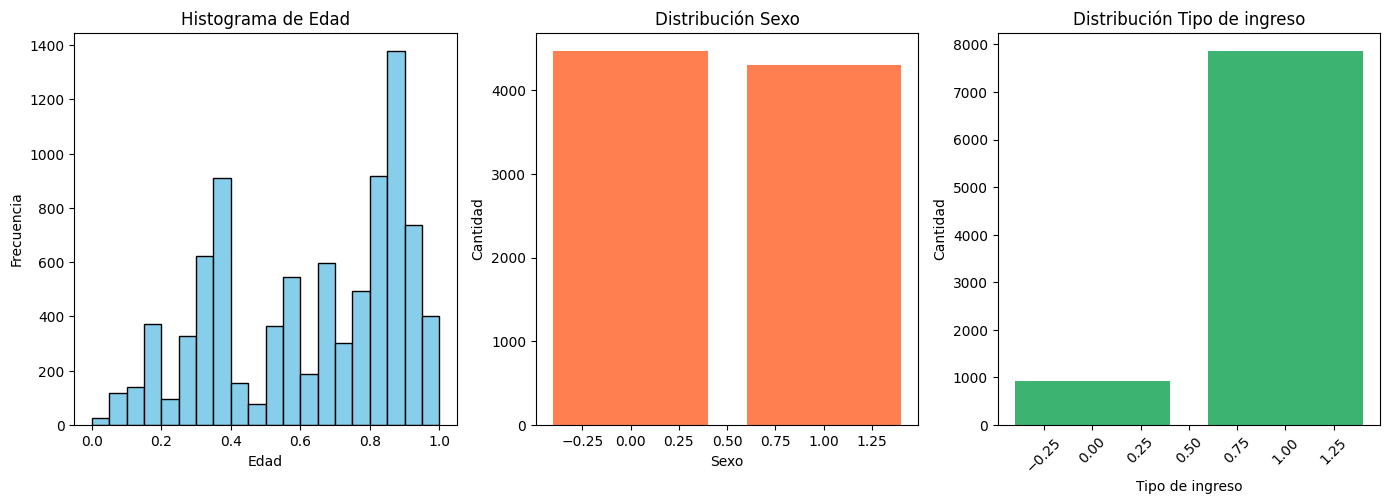

In [185]:
fig, axs = plt.subplots(1, 3, figsize=(14, 5))  # 1 fila, 3 columnas

# 1. Histograma Edad
axs[0].hist(X_RF['EDAD'], bins=20, color='skyblue', edgecolor='black')
axs[0].set_title("Histograma de Edad")
axs[0].set_xlabel("Edad")
axs[0].set_ylabel("Frecuencia")

# 2. Distribuci√≥n Sexo (variable categ√≥rica)
sex_counts = X_RF['SEXO'].value_counts()
axs[1].bar(sex_counts.index, sex_counts.values, color='coral')
axs[1].set_title("Distribuci√≥n Sexo")
axs[1].set_xlabel("Sexo")
axs[1].set_ylabel("Cantidad")

# 3. Distribuci√≥n Tipo de ingreso (variable categ√≥rica)
tipo_counts = X_RF['TIPO DE INGRESO'].value_counts()
axs[2].bar(tipo_counts.index, tipo_counts.values, color='mediumseagreen')
axs[2].set_title("Distribuci√≥n Tipo de ingreso")
axs[2].set_xlabel("Tipo de ingreso")
axs[2].set_ylabel("Cantidad")
axs[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()



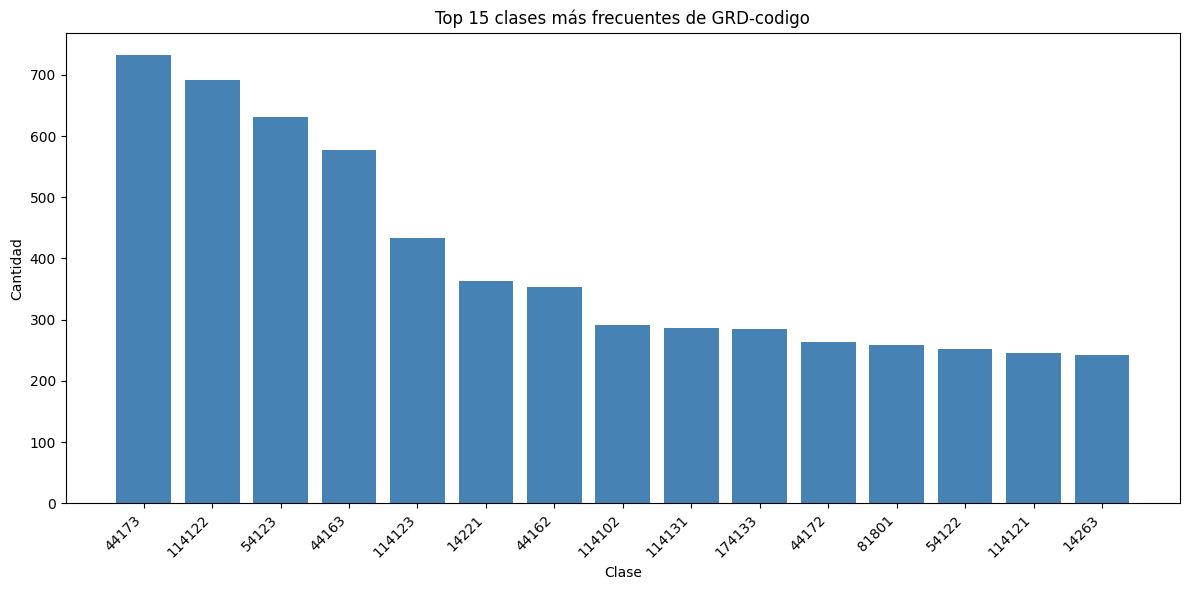

In [186]:
top_n = 15  # 15 clases con m√°s muestras
top_classes = Y_RF.value_counts().head(top_n)

plt.figure(figsize=(12,6))
plt.bar(top_classes.index.astype(str), top_classes.values, color='steelblue')
plt.title(f"Top {top_n} clases m√°s frecuentes de GRD-codigo")
plt.xlabel("Clase")
plt.ylabel("Cantidad")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Separaci√≥n de muestras para train y test

In [194]:
X_train_RF , X_test_RF , Y_train_RF , Y_test_RF = train_test_split(X_RF, Y_RF,stratify=y)

print("Train: ",X_train_RF.shape , Y_train_RF.shape)
print("Test: ",X_test_RF.shape , Y_test_RF.shape)

Train:  (6581, 11) (6581,)
Test:  (2194, 11) (2194,)


## Definici√≥n del modelo RF y entrenamiento

In [195]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

rf0 = RandomForestClassifier(n_estimators=200, class_weight="balanced")
rf0.fit(X_train_RF, Y_train_RF)

y_pred = rf0.predict(X_test_RF)

le = LabelEncoder()
df_filtered['GRD_encoded'] = le.fit_transform(df_filtered['GRD -CODIGO'])
target_names_str = [str(c) for c in le.classes_]

print(classification_report(Y_test_RF, y_pred, target_names=target_names_str))



              precision    recall  f1-score   support

       14221       0.76      0.70      0.73        91
       14222       0.57      0.39      0.46        44
       14263       0.83      0.83      0.83        60
       44153       0.51      0.71      0.60        51
       44161       0.59      0.69      0.64        51
       44162       0.62      0.36      0.45        89
       44163       0.70      0.80      0.75       145
       44171       0.63      0.51      0.56        43
       44172       0.70      0.21      0.33        66
       44173       0.75      0.95      0.84       183
       44181       0.83      0.94      0.88        51
       51153       0.47      0.21      0.30        42
       54122       0.54      0.21      0.30        63
       54123       0.67      0.91      0.77       158
       54152       0.24      0.30      0.27        56
       54153       0.28      0.27      0.27        52
       64171       0.90      0.82      0.86        44
       64181       0.44    

In [196]:
accuracy = rf0.score(X_test_RF , Y_test_RF)
print("Accuracy:", accuracy)

Accuracy: 0.6517775752051048


In [197]:
# Lista de √°rboles
arboles = rf0.estimators_
print(f"N√∫mero de √°rboles: {len(arboles)}")

N√∫mero de √°rboles: 200


## KFolds Cross Validation

In [65]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

rf = RandomForestRegressor(random_state=42)

# Validaci√≥n cruzada con 5 folds y m√©trica R2
scores = cross_val_score(rf, X_RF, Y_RF, cv=5, scoring='r2')

print("Scores R2 en cada fold:", scores)
print("R2 promedio CV:", np.mean(scores))


Scores R2 en cada fold: [0.74724864 0.66861352 0.66891909 0.70525767 0.71170858]
R2 promedio CV: 0.7003495013770082


## B√∫squeda de par√°metros usando la GridSearch

In [66]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, scoring='r2', n_jobs=-1, verbose=2)

grid_search.fit(X_train_RF, Y_train_RF)

print("Mejores par√°metros:", grid_search.best_params_)
print("Mejor score R2 (CV):", grid_search.best_score_)

# Opcional: evaluar en test
best_rf = grid_search.best_estimator_
test_score = best_rf.score(X_test_RF, Y_test_RF)
print("Score R2 en test con mejor modelo:", test_score)


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Mejores par√°metros: {'max_depth': None, 'min_samples_leaf': 4, 'n_estimators': 300}
Mejor score R2 (CV): 0.7143967015461623
Score R2 en test con mejor modelo: 0.6998471889594444


In [67]:
grid_search.best_params_

{'max_depth': None, 'min_samples_leaf': 4, 'n_estimators': 300}

In [68]:
rf_grid = RandomForestRegressor(min_samples_leaf=4, n_estimators= 300)
rf_grid.fit(X_train_RF, Y_train_RF)
score_grid = rf_grid.score(X_test_RF, Y_test_RF)  
print("R^2 score:", score_grid)

R^2 score: 0.6992741106367468


##  M√©tricas

<hr>
<h1> Regresi√≥n Log√≠stica - S </h1>

<hr>
<h1> Comparaci√≥n de los algoritmos </h1>

<hr>
<h2> Conclusiones </h2>